## compare spectrums with EnMap and Hypso


In [1]:
#import for HYPSO
from hypso import Hypso1, Hypso2
import os 
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

import funcions_autonom as f

In [2]:
dir_path = "."
 
frohavet_path_0330 = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1a.nc")
frohavet_path_0330_b = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1b.nc")
frohavet_path_0330_c = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1c.nc")
frohavet_path_0330_d = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1d.nc")

satobj_h1 = Hypso1( path = frohavet_path_0330, verbose = True )

l1a_cube = satobj_h1.l1a_cube
l1b_cube = Hypso1( path = frohavet_path_0330_b, verbose = True )
l1c_cube = Hypso1( path = frohavet_path_0330_c, verbose = True )
l1d_cube = Hypso1( path = frohavet_path_0330_d, verbose = True )

l1c_cube = l1c_cube.l1c_cube
l1b_cube = l1b_cube.l1b_cube
l1d_cube = l1d_cube.l1d_cube

satobj_h1.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1921
[INFO] ADCS time range: 1680171540.000000 to 1680172458.250000
[INFO] Frame time range: 1680172226.731407 to 1680172276.481407
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

In [3]:
#wawelengths
x_1 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
x=x_1[5:115]

target_lat = 64.00712963862559 #område 4, korrigert
target_lon =   9.7215117950237

latitudes = satobj_h1.latitudes
longitudes = satobj_h1.longitudes

In [ ]:
rowForPos = []
colForPos = []

# Calculate the absolute difference between the target and all lat/lon values
lat_diff = np.abs(latitudes - target_lat)
lon_diff = np.abs(longitudes - target_lon)
# Find the indices of the minimum difference
row, col = np.unravel_index(np.argmin(lat_diff + lon_diff), latitudes.shape)
#row = np.argmin(np.abs(latitudes - target_lat[i]))
#col = np.argmin(np.abs(longitudes - target_lon[i]))
rowForPos.append(row)
colForPos.append(col)
lat_test = latitudes[row][col]
lon_test = longitudes[row][col]
#print("target lat, long: ",target_lat[i], target_lon[i])
#print("closest found lat, long: ", lat_test,lon_test)
print("distance between searced lat, long and found lat long:", abs(lat_test - target_lat), abs(lon_test - target_lon))
print("row, col: ", row, col)

print(latitudes[row][col])#### korrektt


distance between searced lat, long and found lat long: 0.0017467576846712518 0.00039160899563306373
row, col:  146 437
64.00887639631026
62.51015069689626


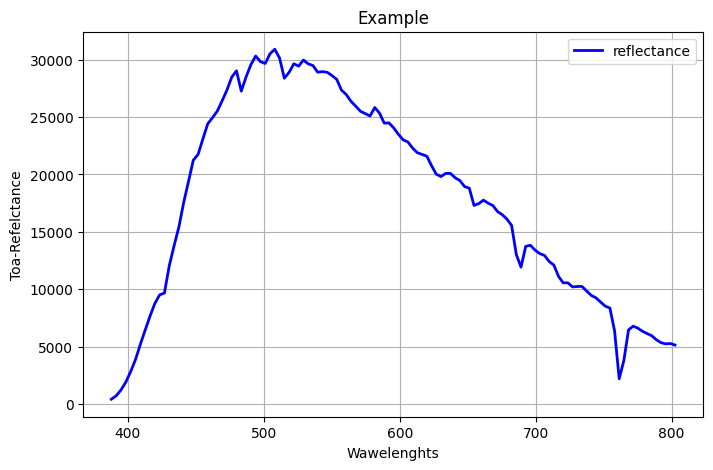

In [5]:
y= []
for i in range(120):
    y.append(satobj_h1.l1a_cube[146,437,i].values)

plt.figure(figsize=(8, 5))
plt.plot(x_1, y, label="reflectance", color="blue", linewidth=2)

# Add labels and title
plt.xlabel("Wawelenghts")
plt.ylabel("Toa-Refelctance")
plt.title("Example")

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
